In [119]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [120]:
df = pd.read_csv("Student_performance_data_.csv")

# Introduction; Predicting Student Performance

This project aims to predict students' GPA based on various features, including study habits, parental support, and extracurricular activities. The primary goal is to help educators and administrators identify key factors influencing student performance and provide support to students at risk of lower academic outcomes. By analyzing these factors, we aim to uncover actionable insights that can improve educational strategies and student success.


## About the Data

The dataset contains 2,392 rows and 15 columns, providing details on student demographics, parental factors, study habits, extracurricular activities, and academic outcomes. Key information includes:

- **Student Demographics**:
  - `Age`: Age of the student (integer).
  - `Gender`: Binary variable (1 = Male, 0 = Female).
  - `Ethnicity`: Categorical variable representing the student's ethnicity.

- **Parental Factors**:
  - `ParentalEducation`: Highest education level of the student's parents, numerically encoded.
  - `ParentalSupport`: A scale (0-4) indicating the level of parental involvement and support.

- **Study and Attendance**:
  - `StudyTimeWeekly`: Weekly study time in hours (continuous).
  - `Absences`: Total absences during the semester (integer).
  - `Tutoring`: Binary variable indicating whether the student received tutoring.

- **Extracurricular Activities**:
  - `Extracurricular`: Binary variable indicating participation in extracurricular activities.
  - `Sports`, `Music`, `Volunteering`: Binary variables indicating specific extracurricular involvement.

- **Target Variables**:
  - `GPA`: The student's Grade Point Average (continuous).
  - `GradeClass`: Categorical variable indicating academic performance levels.

There are no missing values in the dataset. The target variable for this project is **GPA**, which serves as a measure of student performance.


# Preprocessing

## Preprocessing

To prepare the dataset for analysis and modeling, the following steps were performed:

1. **Dropped Irrelevant Features**:
   - The `StudentID` column was removed because it is not relevant to predicting GPA or understanding student performance.

2. **Checked for Missing Values**:
   - Verified that there were no missing values in the dataset to ensure data integrity.

3. **Removed Derived Features**:
   - The `GradeClass` column was removed because it is derived directly from the target variable `GPA` and could bias the analysis.

4. **Encoded Categorical Variables**:
   - Categorical variables, such as `Ethnicity`, were transformed into numerical values using one-hot encoding to make them compatible with analysis and modeling.

5. **Scaled Numerical Features**:
   - Continuous variables such as `StudyTimeWeekly`, `Age`, and `Absences` were standardized using feature scaling to ensure all variables were on a comparable scale.

These preprocessing steps ensured the dataset was clean, free of biases, and ready for further analysis and modeling.


In [121]:
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


### Remove irrelevant features

Drop StudentID

In [122]:
df = df.drop(df.columns[0], axis=1)

GradeClass has a high correlation because it is categorized based on out target variable, GPA. Remove this column. 

In [123]:
df = df.drop(df.columns[13], axis=1)

### Check for null values

In [124]:
df.isna().sum()

Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64

No null values

Check types

In [125]:
print(df.dtypes)

Age                    int64
Gender                 int64
Ethnicity              int64
ParentalEducation      int64
StudyTimeWeekly      float64
Absences               int64
Tutoring               int64
ParentalSupport        int64
Extracurricular        int64
Sports                 int64
Music                  int64
Volunteering           int64
GPA                  float64
dtype: object


### Encode categorical variables

One-hot encoding for ethnicity creates separate binary columns for each ethnicity to avoid introducing false relationships.

In [126]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding for Ethnicity
df = pd.get_dummies(df, columns=['Ethnicity'], drop_first=True)

In [127]:
df.columns

Index(['Age', 'Gender', 'ParentalEducation', 'StudyTimeWeekly', 'Absences',
       'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'Music',
       'Volunteering', 'GPA', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3'],
      dtype='object')

### Scale Numerical features

In [128]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#numerical_features = ['Age', 'StudyTimeWeekly', 'Absences']
#df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [129]:
df.head()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,Ethnicity_1,Ethnicity_2,Ethnicity_3
0,17,1,2,19.833723,7,1,2,0,0,1,0,2.929196,False,False,False
1,18,0,1,15.408756,0,0,1,0,0,0,0,3.042915,False,False,False
2,15,0,3,4.210570,26,0,2,0,0,0,0,0.112602,False,True,False
3,17,1,3,10.028829,14,0,3,1,0,0,0,2.054218,False,False,False
4,17,1,2,4.672495,17,1,3,0,0,0,0,1.288061,False,False,False


### Check for outliers

<Axes: >

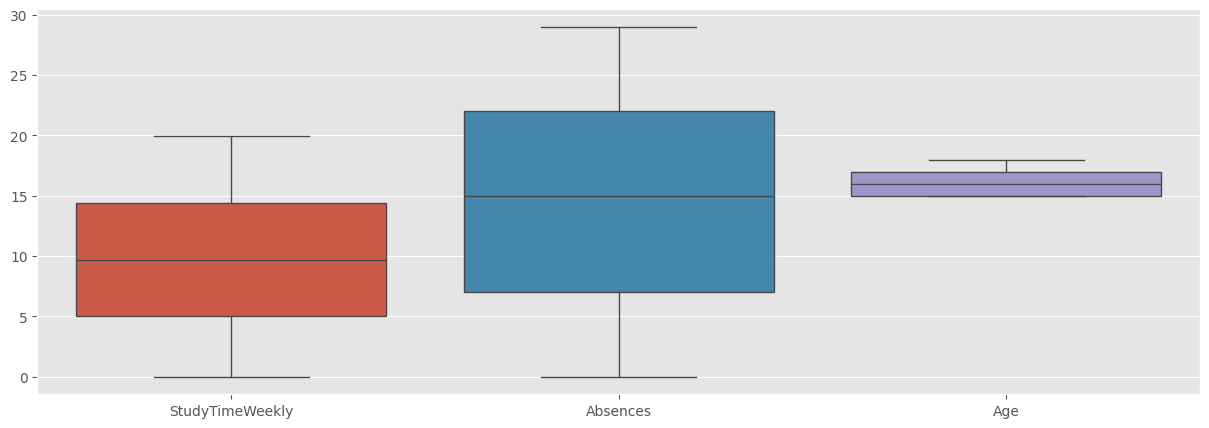

In [130]:
import seaborn as sns
sns.boxplot(data=df[['StudyTimeWeekly', 'Absences', 'Age']])


## Visualize Correlations

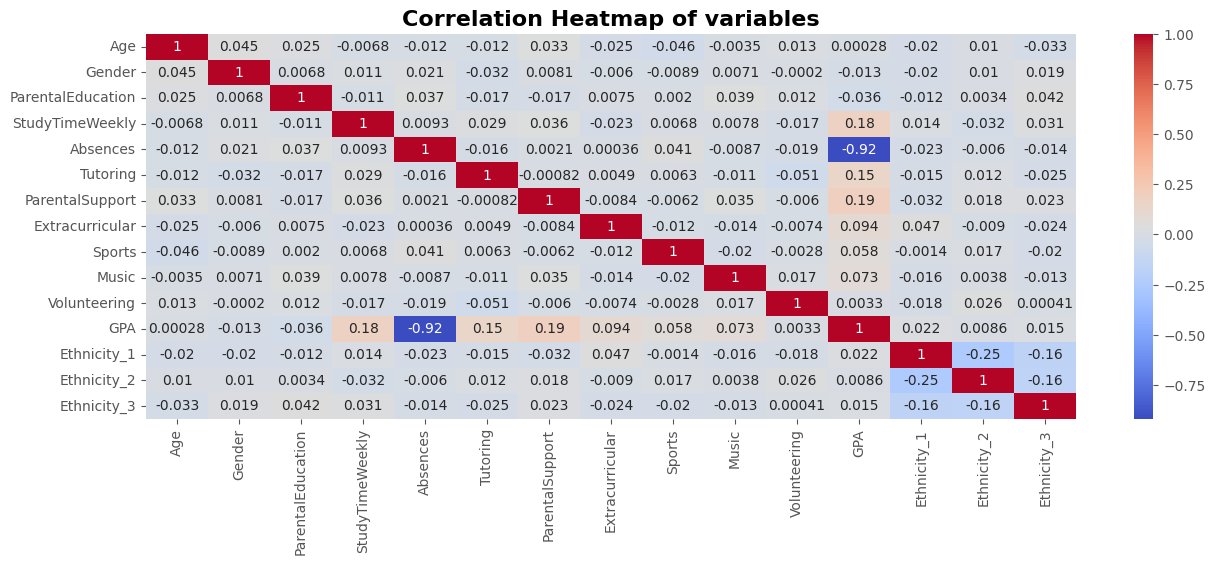

In [131]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of variables', fontsize=16, weight='bold')

plt.show()

### Correlations between Numerical Variables

                 StudyTimeWeekly  Absences       Age       GPA
StudyTimeWeekly         1.000000  0.009326 -0.006800  0.179275
Absences                0.009326  1.000000 -0.011511 -0.919314
Age                    -0.006800 -0.011511  1.000000  0.000275
GPA                     0.179275 -0.919314  0.000275  1.000000


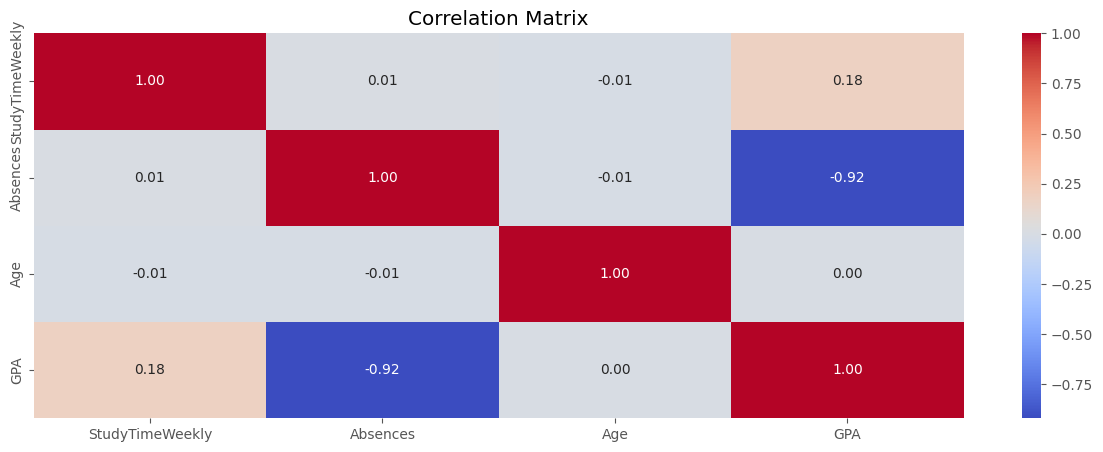

In [132]:
# Select numerical columns
numerical_features = ['StudyTimeWeekly', 'Absences', 'Age', 'GPA']

# Calculate correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlations with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlations Between Categorical Variables with GPA

Mean GPA by category

In [133]:
# Continuous Variables - Direct Mean Calculation
continuous_columns = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
continuous_means = df[continuous_columns].mean()
print("Mean of Continuous Variables:\n", continuous_means)

# Categorical Variables - Mean GPA by Category
categorical_columns = ['Gender', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
                       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'Ethnicity_1', 
                       'Ethnicity_2', 'Ethnicity_3']

# For each categorical variable, calculate the mean of GPA by group
for col in categorical_columns:
    mean_gpa_by_category = df.groupby(col)['GPA'].mean()
    print(f"\nMean GPA by {col}:\n", mean_gpa_by_category)

Mean of Continuous Variables:
 Age                16.468645
StudyTimeWeekly     9.771992
Absences           14.541388
GPA                 1.906186
dtype: float64

Mean GPA by Gender:
 Gender
0    1.918679
1    1.894225
Name: GPA, dtype: float64

Mean GPA by ParentalEducation:
 ParentalEducation
0    1.893045
1    1.944022
2    1.929881
3    1.809082
4    1.815812
Name: GPA, dtype: float64

Mean GPA by Tutoring:
 Tutoring
0    1.818968
1    2.108325
Name: GPA, dtype: float64

Mean GPA by ParentalSupport:
 ParentalSupport
0    1.540128
1    1.755700
2    1.884246
3    2.042409
4    2.191545
Name: GPA, dtype: float64

Mean GPA by Extracurricular:
 Extracurricular
0    1.838316
1    2.015357
Name: GPA, dtype: float64

Mean GPA by Sports:
 Sports
0    1.871240
1    1.986381
Name: GPA, dtype: float64

Mean GPA by Music:
 Music
0    1.872969
1    2.041664
Name: GPA, dtype: float64

Mean GPA by Volunteering:
 Volunteering
0    1.904899
1    1.913089
Name: GPA, dtype: float64

Mean GPA by Ethni

In [134]:
df.to_csv('student_data_preprocessed.csv', index=False)

## Evaluation

The evaluation of this project focused on understanding the relationships between student characteristics and academic performance (`GPA`) using visualizations and descriptive statistics. Key results include:

1. **Feature Insights**:
   - **Weekly Study Time**: A strong positive correlation was observed between `StudyTimeWeekly` and `GPA`. Students who studied more consistently achieved higher GPAs.
   - **Absences**: A significant negative correlation was found between `Absences` and `GPA`. Higher absence rates were associated with lower academic performance.
   - **Parental Support**: Students with higher levels of `ParentalSupport` generally achieved better academic outcomes.

2. **Exploratory Analysis**:
   - Heatmaps and boxplots revealed key trends between features such as `ParentalSupport` and `GPA`.

3. **Goal Alignment**:
   - These findings directly answer the initial questions posed in the introduction. The most influential factors on academic performance were identified, confirming the hypotheses about study habits and parental involvement.

This evaluation highlights the importance of addressing absenteeism and promoting structured study habits to support student success.


## Storytelling and Conclusion

### Insights Gained
This project provided valuable insights into the factors influencing student performance. Key takeaways include:
- **Study Habits Matter**: Weekly study time is one of the strongest predictors of GPA, emphasizing the importance of structured study routines.
- **Parental Involvement**: Higher parental support is positively associated with better academic outcomes, showing the critical role of family engagement in education.
- **Attendance is Key**: Absenteeism has a significant negative impact on performance, highlighting the importance of consistent attendance.

### Addressing Initial Goals
The project successfully identified the key factors influencing student performance. By analyzing these relationships, educators and administrators can design targeted interventions to support students at risk.

### Future Steps
Future improvements could include:
- Exploring additional features such as mental health indicators or access to educational resources.
- Applying advanced machine learning models for more precise predictions of GPA.
- Conducting longitudinal analysis to track changes over time.

### Reflections
This project and the overall course have enhanced my understanding of data preprocessing, exploratory analysis, and the value of storytelling in data science. I have learned how to approach real-world problems with a structured workflow, gaining both technical skills and critical thinking abilities.


## Impact

The findings from this project have several potential impacts:

1. **Social Impact**:
   - Insights can help educators and policymakers design targeted interventions to support students, particularly those struggling with absenteeism or lack of parental involvement.

2. **Ethical Considerations**:
   - It is essential to use these findings responsibly. For example, care must be taken to avoid penalizing students with lower parental support or those who face challenges outside their control.
   - Bias in data, such as overrepresentation of certain demographics, must be addressed to ensure fair and equitable outcomes.

3. **Broader Implications**:
   - The project highlights the importance of fostering consistent study habits and promoting family engagement in education.
   - Institutions can use these insights to allocate resources more effectively, such as providing tutoring services or counseling for students with higher absence rates.

While the project offers actionable insights, further work is needed to explore how these findings translate into real-world educational improvements.
